# Data preperation
## Ingest, Clean and transform the data.
## Output: Data ready for Balancing the datasets
## Refer to the project report for finer details of data preperation

In [32]:
import sys
print(sys.executable)
import pandas as pd
import numpy as np

C:\ProgramData\Anaconda3\python.exe


# Archive at : https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [33]:
data_original = pd.read_csv('./diabetic_data.csv')

# Visual appreciation of data

In [34]:
print(data_original.describe(include=['object']))
print("\n\ntotal row count: ", data_original.race.count())

             race  gender      age  weight payer_code medical_specialty  \
count      101766  101766   101766  101766     101766            101766   
unique          6       3       10      10         18                73   
top     Caucasian  Female  [70-80)       ?          ?                 ?   
freq        76099   54708    26068   98569      40256             49949   

        diag_1  diag_2  diag_3 max_glu_serum  ... citoglipton insulin  \
count   101766  101766  101766        101766  ...      101766  101766   
unique     717     749     790             4  ...           1       4   
top        428     276     250          None  ...          No      No   
freq      6862    6752   11555         96420  ...      101766   47383   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
count               101766              101766                   101766   
unique                   4                   2                        2   
top                     No       

In [35]:
print(data_original.loc[1])# visual inspection of data fields
print(data_original.count())
print(len(data_original.columns))

encounter_id                   149190
patient_nbr                  55629189
race                        Caucasian
gender                         Female
age                           [10-20)
weight                              ?
admission_type_id                   1
discharge_disposition_id            1
admission_source_id                 7
time_in_hospital                    3
payer_code                          ?
medical_specialty                   ?
num_lab_procedures                 59
num_procedures                      0
num_medications                    18
number_outpatient                   0
number_emergency                    0
number_inpatient                    0
diag_1                            276
diag_2                         250.01
diag_3                            255
number_diagnoses                    9
max_glu_serum                    None
A1Cresult                        None
metformin                          No
repaglinide                        No
nateglinide 

# Drop Duplicate observations, if any 
### found no duplicate rows in the dataset

In [36]:
data=data_original.drop_duplicates() # no duplicates found, proceed

print("rows dropped: ", data_original.race.count()-data.race.count())
print("row count: ", data.race.count())

rows dropped:  0
row count:  101766


# Hot Encoding Nominal as well as Ordinal categorical variables

# encode function using pandas

In [37]:

# one hot encoding function
def encode_and_bind(original_df, feature_to_encode):
    dummies = pd.get_dummies(original_df[[feature_to_encode]]) # one hot encoding "feature_to_encode"
    new_df = pd.concat([original_df, dummies], axis=1) # concatinating the hot encodes to the input dataframe
    new_df = new_df.drop([feature_to_encode], axis=1) # dropping the original column
    return(new_df)

# One hot encode calls to udpate the data set.
## necessary prechecks to remove erroneous observations as well

In [38]:
# hot - encode Gender
print(data.gender.unique())

#clean unknown /invalid
data[data.gender =='Unknown/Invalid'].gender.count() # 3 unknown
# data_cleaned = data[data.gender !='Unknown/Invalid'] # alternate way of dropping (or retaining valid values)
data_cleaned = data.drop(data[data.gender =='Unknown/Invalid'].index) # drop the 3 rows of unknowns/invalids

print("rows dropped: ", data.race.count() - data_cleaned.race.count()) # 3 rows dropped
print("\n\ntotal rows: ", data_cleaned.race.count())



data_gender = encode_and_bind(data_cleaned,'gender') # hot encode gender

#data_gender.reset_index(inplace=True) # index reset

print("\n\n", data_gender.columns)# check for hot encoding outcomes
#print(data_gender.describe(include=['object'])) 

['Female' 'Male' 'Unknown/Invalid']
rows dropped:  3


total rows:  101763


 Index(['encounter_id', 'patient_nbr', 'race', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'gender_Female', 

In [39]:
# hot - encode age
print(data_gender.age.unique())# all valid values. no req to drop rows. Proceed with one hot encoding

data_gender_age = encode_and_bind(data_gender,'age') # hot encode gender
print("\n\nrows dropped:", data_gender.race.count()-data_gender_age.race.count()) # no row dropped in this block
print("\n\n",data_gender_age.columns)

print("\n\ntotal rows: ", data_gender_age.race.count())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


rows dropped: 0


 Index(['encounter_id', 'patient_nbr', 'race', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',

In [40]:
# hot - encode race
print(data_gender_age.race.unique())

#clean dataset off rows with "?" @ race coloum
data_gender_age[data_gender_age.race =='?'].race.count() # 2271 ?
data_gender_age[data_gender_age.race =='Other'].race.count() # 1505 Other -> then Caucasian, AfricanAmerican, Asian, Hispanic
data_cleaned_1 = data_gender_age.drop(data_gender_age[data_gender_age.race =='?'].index) # drop the 2271 rows of ?
print("\n\n rows dropped: ", data_gender_age.race.count()-data_cleaned_1.race.count()) # 3 rows dropped.
print("\n\n total rows: ", data_cleaned_1.race.count())
#data_cleaned_1.reset_index(inplace=True) # index reset

#hot encoding race now!
data_gender_age_race = encode_and_bind(data_cleaned_1,'race') # hot encode gender

print("\n\n", data_gender_age_race.columns)# check for hot encoding outcomes

['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


 rows dropped:  2271


 total rows:  99492


 Index(['encounter_id', 'patient_nbr', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
      

In [41]:
# hot - encode serum
print(data_gender_age_race.max_glu_serum.unique())

# no erreneous row on serum, hence
#hot encoding serum now!
data_gender_age_race_serum= encode_and_bind(data_gender_age_race,'max_glu_serum') # hot encode gender

print("\n\n", data_gender_age_race_serum.columns)# check for hot encoding outcomes

['None' '>300' 'Norm' '>200']


 Index(['encounter_id', 'patient_nbr', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'gender_Female', 'gender_Male',
       'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)',
   

In [42]:
# hot - encode A1c
print(data_gender_age_race_serum.A1Cresult.unique())

# no erreneous row on A1c, hence
#hot encoding A1c now!
data_gender_age_race_serum_A1c= encode_and_bind(data_gender_age_race_serum,'A1Cresult') # hot encode gender

print("\n\n", data_gender_age_race_serum_A1c.columns)# check for hot encoding outcomes

['None' '>7' '>8' 'Norm']


 Index(['encounter_id', 'patient_nbr', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'gender_Female', 'gender_Male', 'age_[0-10)', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_

In [43]:
# hot - encode change in change in diab
print(data_gender_age_race_serum_A1c.change.unique())

# no erreneous row on chg, hence
#hot encoding chg in med now!
data_gender_age_race_serum_A1c_chg= encode_and_bind(data_gender_age_race_serum_A1c,'change') # hot encode gender

print("\n\n", data_gender_age_race_serum_A1c_chg.columns)# check for hot encoding outcomes

['No' 'Ch']


 Index(['encounter_id', 'patient_nbr', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'diabetesMed', 'readmitted', 'gender_Female',
       'gender_Male', 'age_[0-10)', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',

In [44]:
# hot - encode change in diabetes med status
print(data_gender_age_race_serum_A1c_chg.diabetesMed.unique())

# no erreneous row on diab, hence
#hot encoding chg in diab now!
data_gender_age_race_serum_A1c_chg_diab= encode_and_bind(data_gender_age_race_serum_A1c_chg,'diabetesMed') # hot encode gender

print("\n\n", data_gender_age_race_serum_A1c_chg_diab.columns)# check for hot encoding outcomes

['No' 'Yes']


 Index(['encounter_id', 'patient_nbr', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'readmitted', 'gender_Female', 'gender_Male',
       'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)',
       'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)'

In [45]:
# hot - encode change in insulin
print(data_gender_age_race_serum_A1c_chg_diab.insulin.unique())

# no erreneous row on diab, hence
#hot encoding chg in diab now!
data_gender_age_race_serum_A1c_chg_diab_insulin= encode_and_bind(data_gender_age_race_serum_A1c_chg_diab,'insulin') # hot encode gender

print("\n\n", data_gender_age_race_serum_A1c_chg_diab_insulin.columns)# check for hot encoding outcomes

['No' 'Up' 'Steady' 'Down']


 Index(['encounter_id', 'patient_nbr', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'readmitted', 'gender_Female', 'gender_Male',
       'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)',
       'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-

# Column drops 
## Dimensionality reduction as well as domain knowledge acquired through research papers

In [46]:
# coloumn drops

print("\n\n", data_gender_age_race_serum_A1c_chg_diab_insulin.columns)
print("\n\n", data_gender_age_race_serum_A1c_chg_diab_insulin.weight.unique())

#clean dataset off rows with "?" @ weight coloum
data_gender_age_race_serum_A1c_chg_diab_insulin[data_gender_age_race_serum_A1c_chg_diab_insulin.weight =='?'].weight.count() # 96433 ? #as weight is not captured for almost whole of data set, we shall drop the weight feature!


print("\n\n", data_gender_age_race_serum_A1c_chg_diab_insulin.encounter_id.unique())# carries no business value to classification, drop!

print("\n\n", data_gender_age_race_serum_A1c_chg_diab_insulin.patient_nbr.unique())# carries no business value to classification, drop!


print("\n\n", data_gender_age_race_serum_A1c_chg_diab_insulin.payer_code.unique()) # carries no value, drop!

data_gender_age_race[data_gender_age_race_serum_A1c_chg_diab_insulin.payer_code == '?'].payer_code.count() # 50% of entries are ? hence drop!


print("\n\n", data_gender_age_race_serum_A1c_chg_diab_insulin.medical_specialty.unique())# carries no business value to classification, drop!

#Conservative feature drops
data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_c = data_gender_age_race_serum_A1c_chg_diab_insulin.drop(columns=[
             "encounter_id",
             "patient_nbr",
             "weight",
             "payer_code",
             "medical_specialty",
             "diag_1",
             "diag_2",
             "diag_3"])

print(data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_c.columns)

#(A)ggressive feature drops
data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_a = data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_c.drop(columns=[
             "admission_type_id",
             "discharge_disposition_id",
             "admission_source_id"])


print("\n\n aggressive cleaned data:", data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_a)

#retain for future eval: admission_type, discharge_type, admission_source_type
# print(data_gender_age_race.admission_type_id.unique())# 7 admit types, retain for future eval

# print(data_gender_age_race.discharge_disposition_id.unique())# 20+ discharge types, retain for future eval

# print(data_gender_age_race.admission_source_id.unique())# 10+ discharge types, retain for future eval

#data_gender_age_race.time_in_hospital.unique() # clean and no processing required



 Index(['encounter_id', 'patient_nbr', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'readmitted', 'gender_Female', 'gender_Male',
       'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)',
       'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)',
       'age_[80-90)', 

In [47]:
#Drop all medicines information. Reason, are ordinal (have 4 intrinsic states), leads to extra 24*4 features ~100 features and will increase further the dimensionality.
# for interest sake only insulin in kept for study!



# Drop all other medication information

data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_sa = data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_a.drop(columns=[
    "metformin",
    "repaglinide",
    "nateglinide",
    "chlorpropamide",
    "glimepiride",
    "acetohexamide",
    "glipizide",
    "miglitol",
    "troglitazone",
    "tolazamide",
    "examide",
    "citoglipton",
    "glyburide-metformin",
    "glipizide-metformin",
    "glimepiride-pioglitazone",
    "metformin-pioglitazone",
    "metformin-rosiglitazone",
    "glyburide",
    "tolbutamide",
    "pioglitazone",
    "rosiglitazone",
    "acarbose"])

print("\n\n", data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_sa.columns)



 Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted', 'gender_Female',
       'gender_Male', 'age_[0-10)', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'change_Ch', 'change_No', 'diabetesMed_No',
       'diabetesMed_Yes', 'insulin_Down', 'insulin_No', 'insulin_Steady',
       'insulin_Up'],
      dtype='object')


In [48]:
data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_sa # super aggressive : sa

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,gender_Female,...,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,1,41,0,1,0,0,0,1,NO,1,...,1,0,0,1,1,0,0,1,0,0
1,3,59,0,18,0,0,0,9,>30,1,...,1,0,1,0,0,1,0,0,0,1
2,2,11,5,13,2,0,1,6,NO,1,...,1,0,0,1,0,1,0,1,0,0
3,2,44,1,16,0,0,0,7,NO,0,...,1,0,1,0,0,1,0,0,0,1
4,1,51,0,8,0,0,0,5,NO,0,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,>30,0,...,0,0,1,0,0,1,1,0,0,0
101762,5,33,3,18,0,0,1,9,NO,1,...,1,0,0,1,0,1,0,0,1,0
101763,1,53,0,9,1,0,0,13,NO,0,...,1,0,1,0,0,1,1,0,0,0
101764,10,45,2,21,0,0,1,9,NO,1,...,1,0,1,0,0,1,0,0,0,1


# confirm no Null value in the data set

In [49]:

data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_sa.isnull().any().any()

data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_sa.isnull().values.any()

data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_sa.isnull().values.sum()

data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_sa.isnull().sum().sum()

0

# Convert strings to integers for the predicted variable i.e. readmitted

In [50]:
data_final = data_gender_age_race_serum_A1c_chg_diab_insulin_irrelweight_sa

data_final.readmitted.unique()

# string to integer conversion for the variable to be classified. 0 = no record of readmit, 1 >30 days to readmit, 2< 30 days to readmit 





data_final.readmitted.replace(['NO','>30','<30'],[0,1,2],inplace = True)

for n in range(0,3):
    print("\n readmitted value : ", n, " : ", data_final[data_final.readmitted == n].readmitted.count()/data_final.readmitted.count())


 readmitted value :  0  :  0.535882281992522

 readmitted value :  1  :  0.3518574357737306

 readmitted value :  2  :  0.11226028223374744


# let's create targets - Predicted variables 

#1. no readmit, readmit > 30 days, readmit < 30 days: col name : readmitted
#2. no readmit, and readmit (does not matter < or > 30 days)
#3. no readmit OR readmit > 30 days, and readmit within 30 days

# create a new variable readmit_noreadmit
#2. no readmit, and readmit (does not matter < or > 30 days)

In [51]:
data_final = data_final.assign(readmit_noreadmit = data_final.readmitted)

data_final[data_final.readmit_noreadmit == 2].readmit_noreadmit.count()
data_final.readmit_noreadmit.replace([2],[1],inplace=True)
for n in range(0,3):
    print("\n readmit_noreadmit value : ", n, " : ", 
          data_final[data_final.readmit_noreadmit == n].readmit_noreadmit.count()/data_final.readmit_noreadmit.count())


 readmit_noreadmit value :  0  :  0.535882281992522

 readmit_noreadmit value :  1  :  0.464117718007478

 readmit_noreadmit value :  2  :  0.0


# create a new variable readmit_in_30_days
#3. no readmit OR readmit > 30 days, and readmit within 30 days

In [52]:
data_final = data_final.assign(readmit_in_30_days = data_final.readmitted)

data_final[data_final.readmit_in_30_days == 1].readmit_noreadmit.count()
data_final.readmit_in_30_days.replace([1,2],[0,1],inplace=True)
for n in range(0,3):
    print("\n readmit_noreadmit value : ", n, " : ", 
          data_final[data_final.readmit_in_30_days == n].readmit_in_30_days.count()/data_final.readmit_in_30_days.count())


 readmit_noreadmit value :  0  :  0.8877397177662526

 readmit_noreadmit value :  1  :  0.11226028223374744

 readmit_noreadmit value :  2  :  0.0


In [53]:
data_final.readmit_noreadmit.unique()

array([0, 1], dtype=int64)

In [54]:
data_final[['readmitted','readmit_noreadmit','readmit_in_30_days']].sample(20)

,readmitted,readmit_noreadmit,readmit_in_30_days
89310,1,1,0
37877,0,0,0
96994,1,1,0
46054,0,0,0
55889,1,1,0
43786,0,0,0
31677,0,0,0
46303,1,1,0
10197,0,0,0
42546,0,0,0


In [55]:
len(data_final.columns)

44

In [56]:
data_final.to_csv('./diabetic_data_prepared.csv')

In [57]:
data_final

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,gender_Female,...,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,insulin_Down,insulin_No,insulin_Steady,insulin_Up,readmit_noreadmit,readmit_in_30_days
0,1,41,0,1,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
1,3,59,0,18,0,0,0,9,1,1,...,1,0,0,1,0,0,0,1,1,0
2,2,11,5,13,2,0,1,6,0,1,...,0,1,0,1,0,1,0,0,0,0
3,2,44,1,16,0,0,0,7,0,0,...,1,0,0,1,0,0,0,1,0,0
4,1,51,0,8,0,0,0,5,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,1,0,...,1,0,0,1,1,0,0,0,1,0
101762,5,33,3,18,0,0,1,9,0,1,...,0,1,0,1,0,0,1,0,0,0
101763,1,53,0,9,1,0,0,13,0,0,...,1,0,0,1,1,0,0,0,0,0
101764,10,45,2,21,0,0,1,9,0,1,...,1,0,0,1,0,0,0,1,0,0


In [58]:
corrdata = data_final.drop(columns = ['readmitted','readmit_noreadmit','readmit_in_30_days'])

In [65]:
len(corrdata.columns)

41

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(50,50))
    
    
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    print("\n\n\\n")
    plt.show()
    #plt.savefig('corrmatrix.pdf')
   # print(correlations)
    




\n


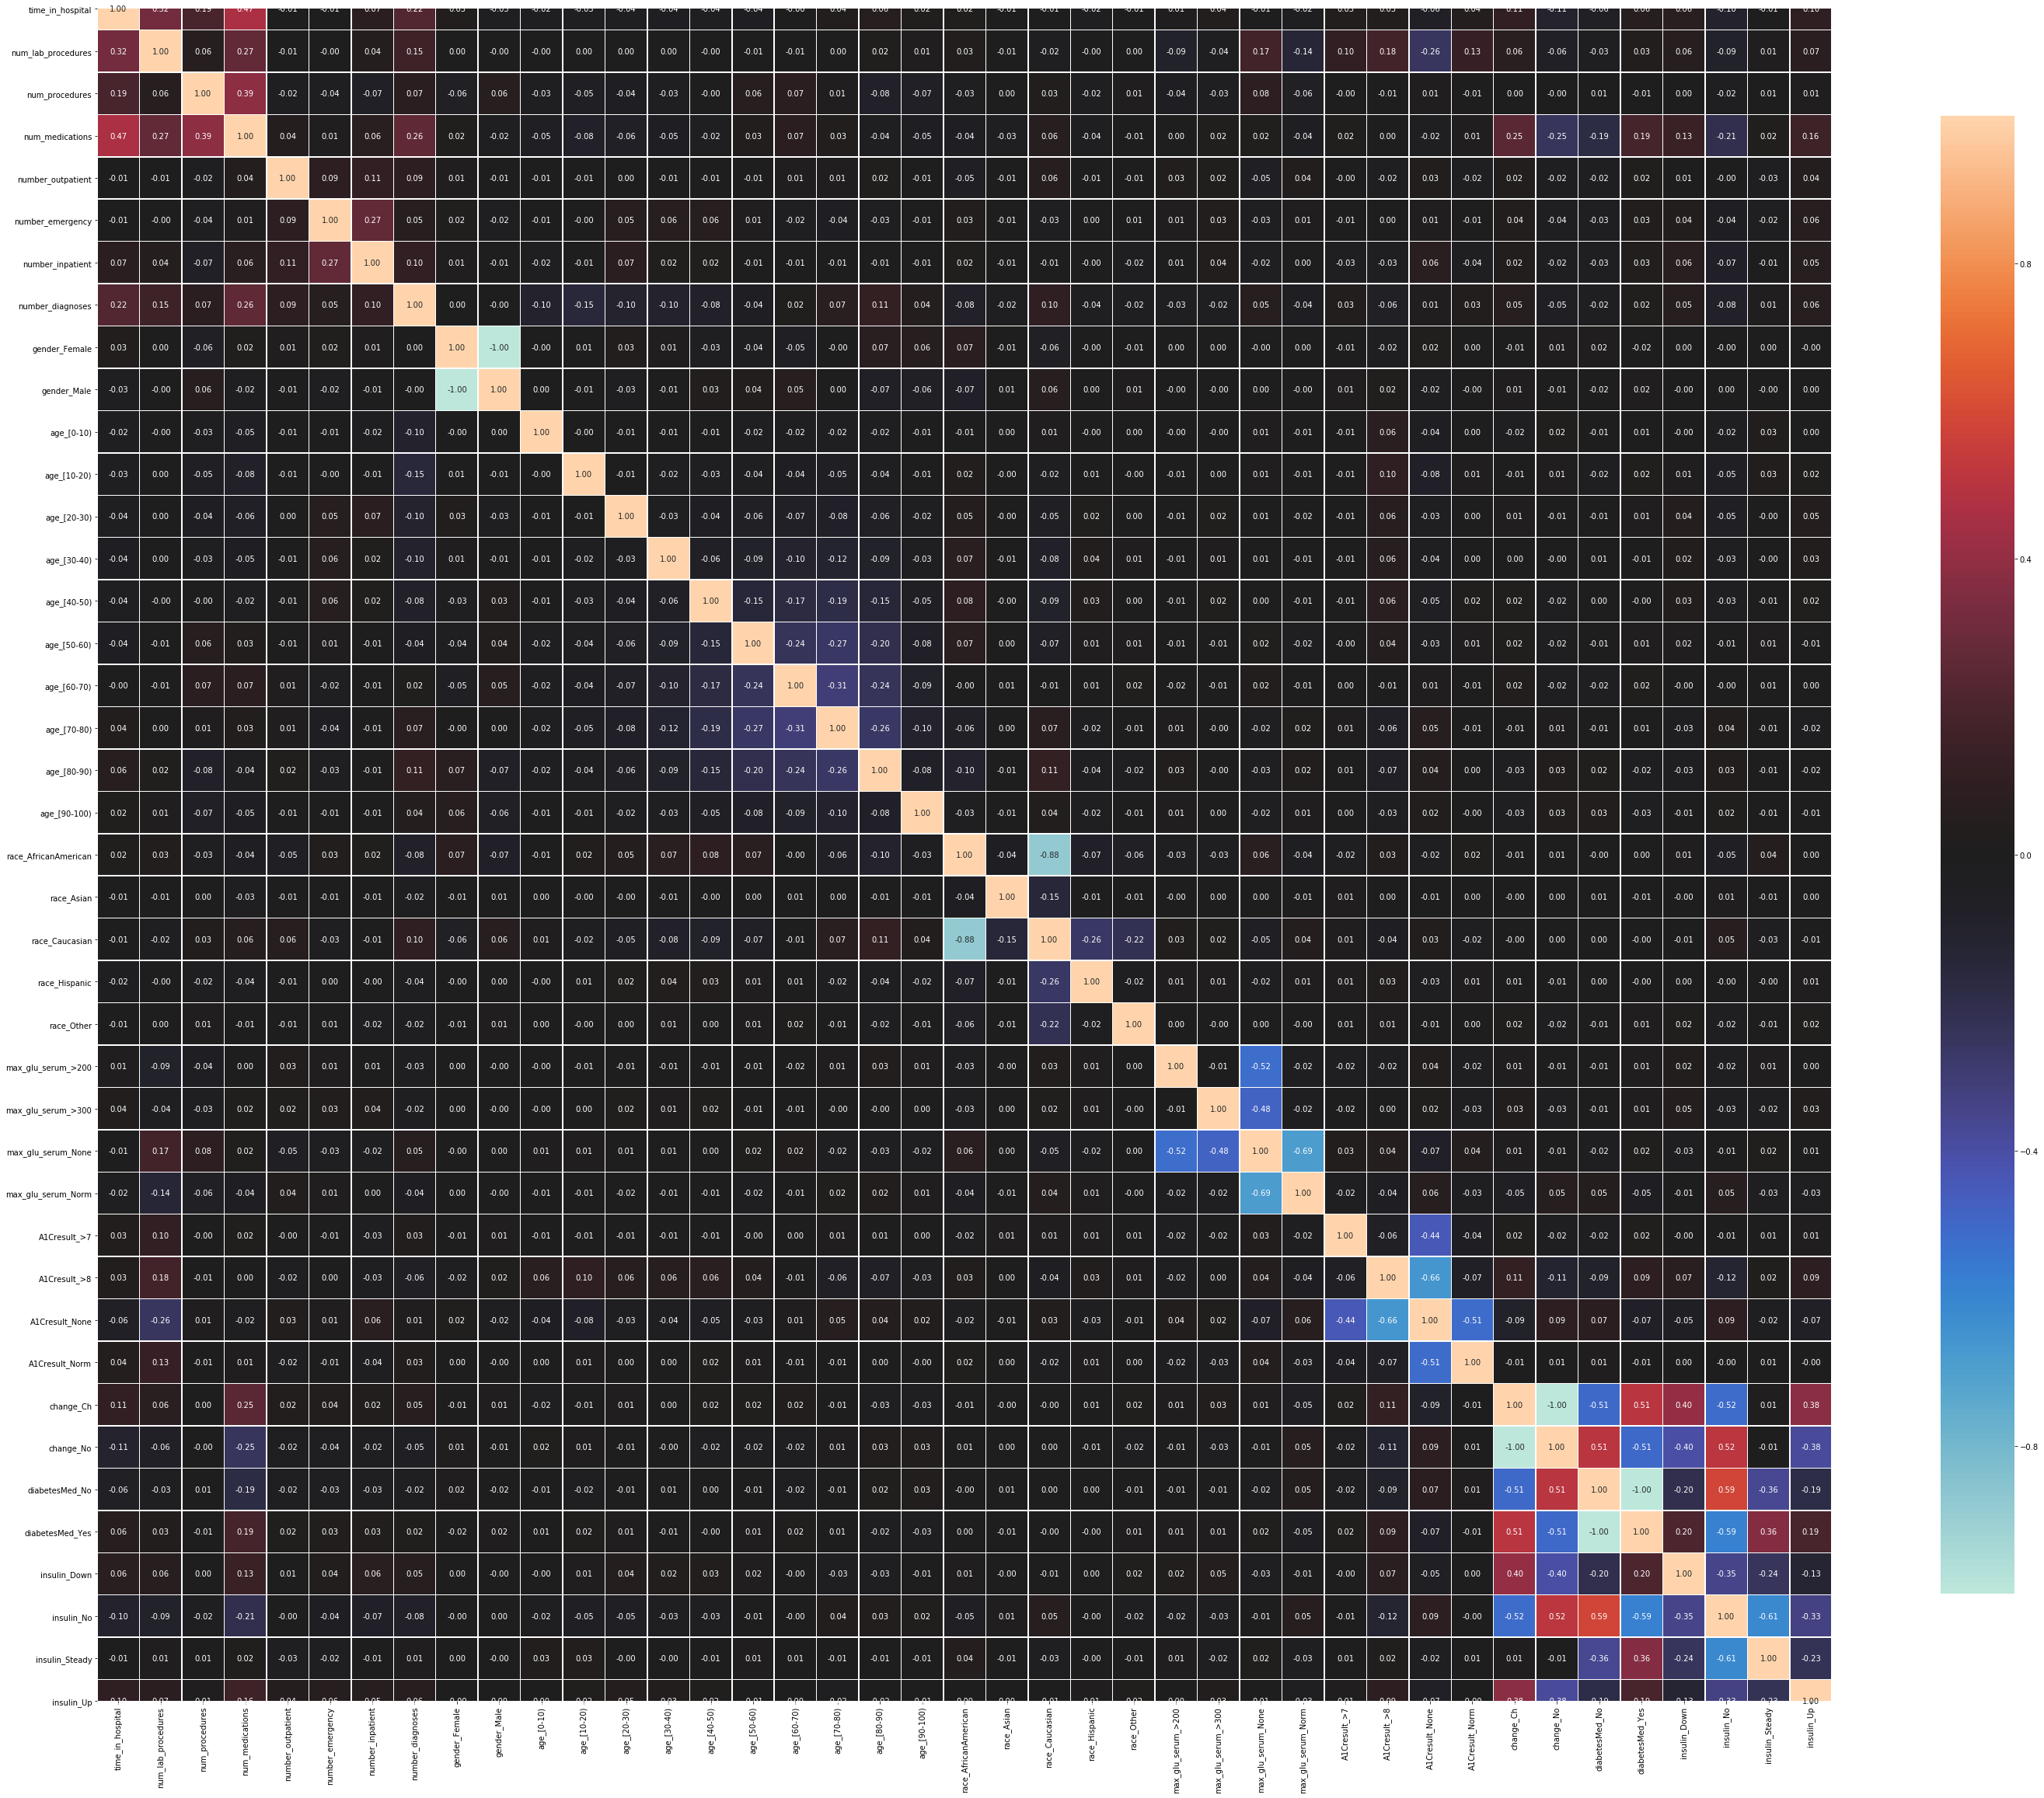

In [61]:
correlation_heatmap(corrdata)